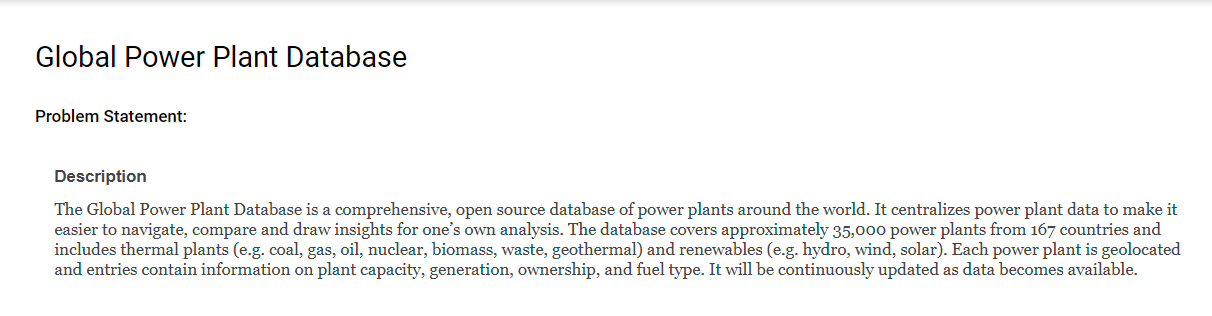

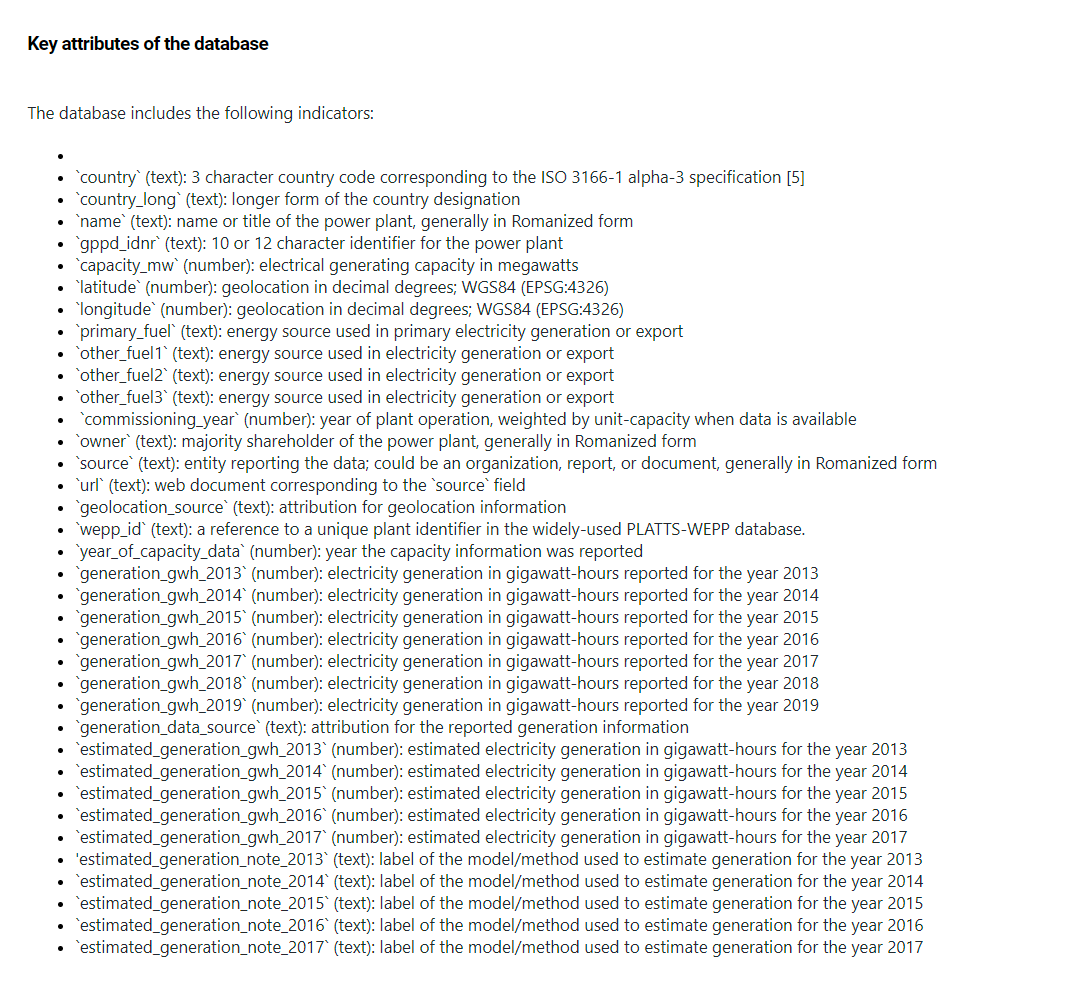

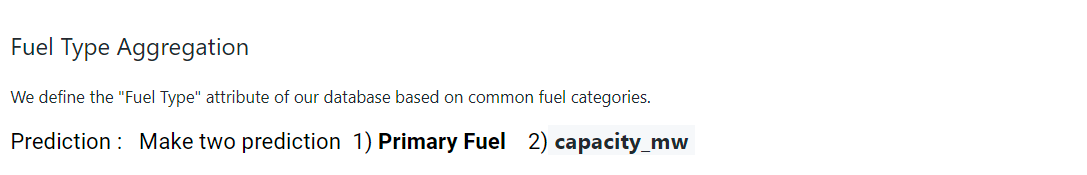

# Predicting the Primary Fuel

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv("database_IND.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [13]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,NaN,NaN,iEnergy Wind Farms,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV134503...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

# Observation

this dataset has 907 rows and 27 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Observation

We have float,and object data in dataset. we should do encoding for object data

In [4]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


# observation

comparing 50% and mean generation_gwh_2015 , eneration_gwh_2017,generation_gwh_2016,generation_gwh_2018,generation_gwh_2014 have skewness

comparing 75% and max almost all columns have outliers

In [10]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [10]:
df["geolocation_source"].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [9]:
df["geolocation_source"].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [11]:
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [12]:
df["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

# observaton

The Geolocation_source has 3 unique values

the primary fuel has 8 unique values

# null value check

<AxesSubplot:>

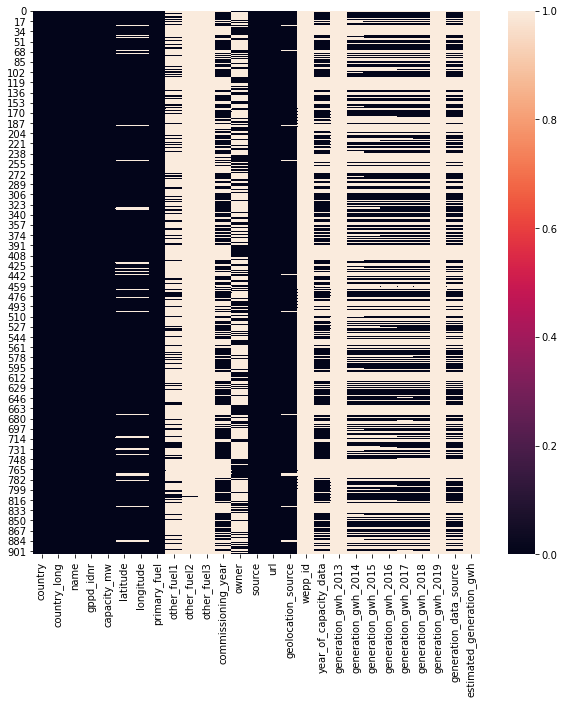

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [14]:
df.shape

(907, 27)

# observation

we can see that estimated_generation_gwh,generation_gwh_2019,wepp_id,other_fuel3,and other_fuel2  has all values with null only so dropping it

In [23]:
df.drop(["estimated_generation_gwh","generation_gwh_2019","generation_gwh_2013","wepp_id","other_fuel3","other_fuel2"],inplace=True,axis=1)

# null value treatment

I am using Simple Imputer to treat Null values

In [24]:
from sklearn.impute import SimpleImputer
numerical=["latitude","longitude","commissioning_year","year_of_capacity_data","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]
categorical=["other_fuel1","owner","geolocation_source","generation_data_source"]

In [25]:
sii = SimpleImputer(strategy = "mean")
siii = SimpleImputer(strategy= "most_frequent")
for num in numerical:
    df[num] = sii.fit_transform(df[num].values.reshape(-1,1))
    
    
for cat in categorical:
    df[cat]  = siii.fit_transform(df[cat].values.reshape(-1,1))


In [26]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# observation

null values are treated using simple imputer

# univariate analysis

<AxesSubplot:xlabel='country', ylabel='count'>

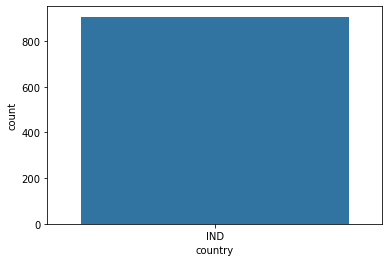

In [9]:
sns.countplot(df['country'])

# observation

Country has only india

<AxesSubplot:xlabel='country_long', ylabel='count'>

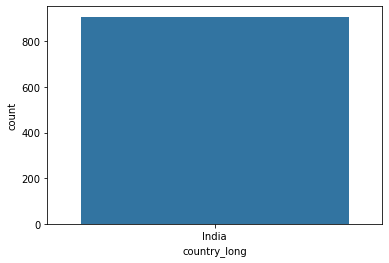

In [10]:
sns.countplot(df['country_long'])

# observation

Country_long also has only india 

we should drop one of them both reprsent only india

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

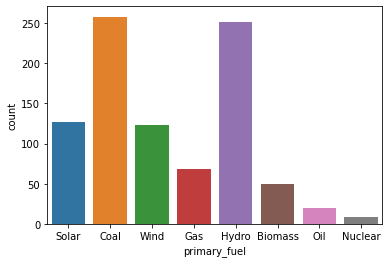

In [11]:
sns.countplot(df['primary_fuel'])

# observation

primary fuel is imbalanced so we need to use SMOTE

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

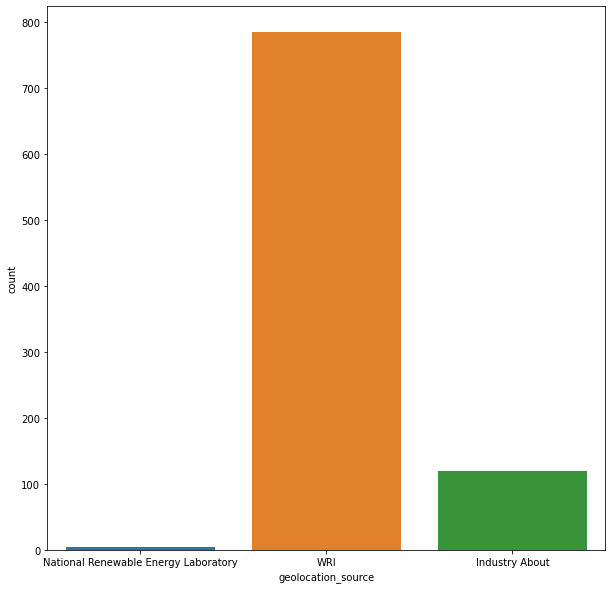

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(df['geolocation_source'])

# observation

WRI Geolocation_source is higher compared to others

<AxesSubplot:xlabel='latitude', ylabel='Density'>

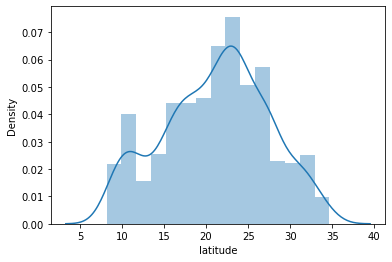

In [3]:
sns.distplot(df['latitude'])

# observation

latitude is normally distributed

<AxesSubplot:xlabel='longitude', ylabel='Density'>

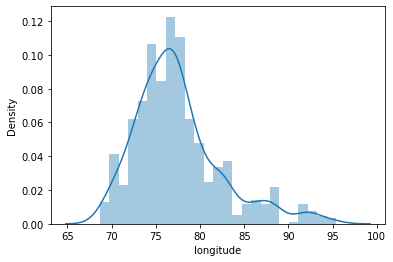

In [4]:
sns.distplot(df['longitude'])

# observation

longitude is positively skewed

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

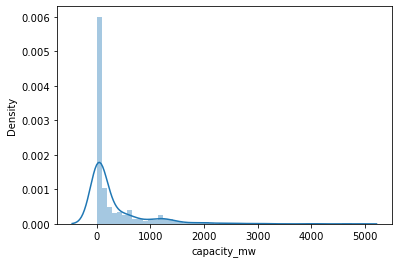

In [5]:
sns.distplot(df['capacity_mw'])

# observation



'capacity_mw' is positively skewed

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

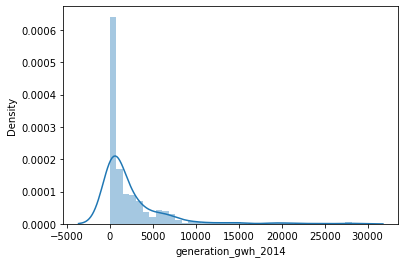

In [8]:
sns.distplot(df['generation_gwh_2014'])

# observation

'generation_gwh_2014' is also positively skewed

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

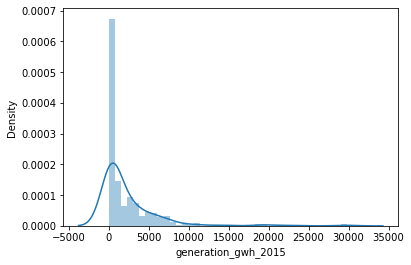

In [9]:
sns.distplot(df['generation_gwh_2015'])

# observation

'generation_gwh_2015' is also positively skewed

<AxesSubplot:xlabel='generation_data_source', ylabel='count'>

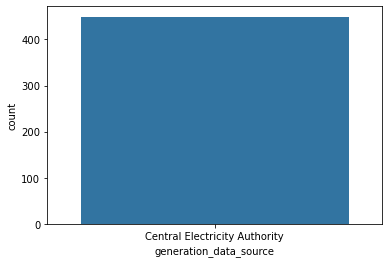

In [12]:
sns.countplot(df['generation_data_source'])

# Observation

data is taken from central electricity authority 

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

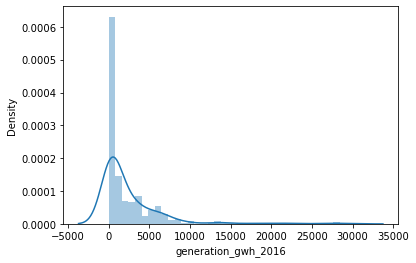

In [13]:
sns.distplot(df['generation_gwh_2016'])

# observation

'generation_gwh_2016'  is positively skewed

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

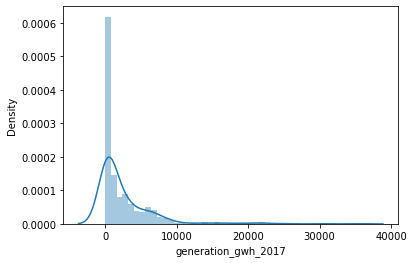

In [14]:
sns.distplot(df['generation_gwh_2017'])

# Observation

'generation_gwh_2017' is also positively skewed

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

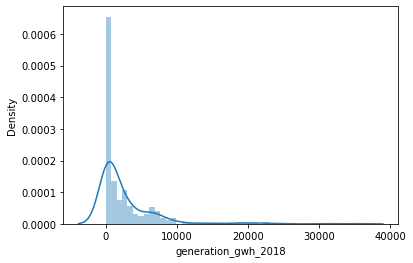

In [15]:
sns.distplot(df['generation_gwh_2018'])

# Observation

'generation_gwh_2018' is also positvely skewed

<AxesSubplot:>

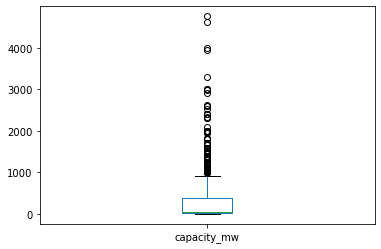

In [17]:
df['capacity_mw'].plot.box()

# Observation

'capacity_mw' might have outliers

In [18]:
sk= ['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019']

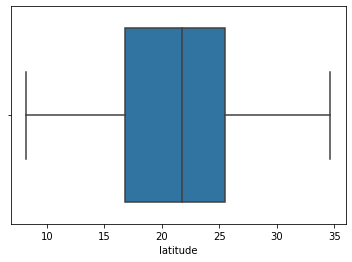

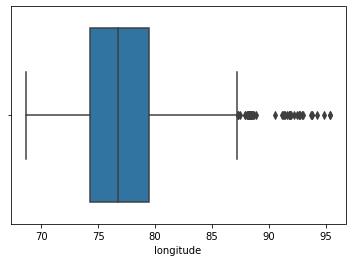

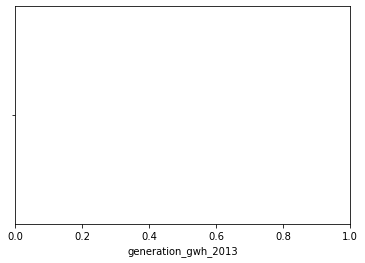

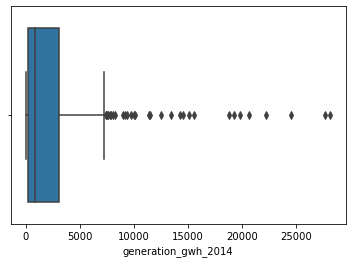

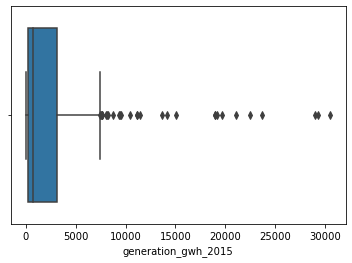

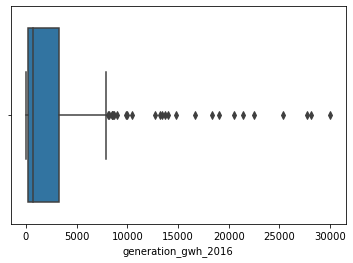

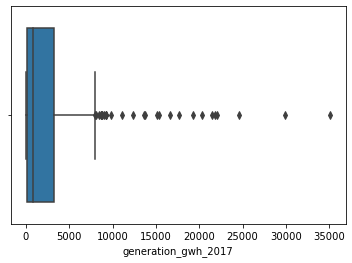

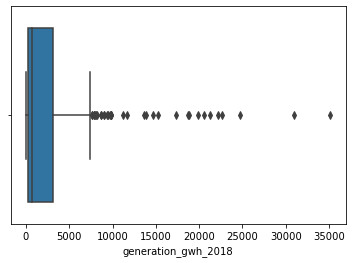

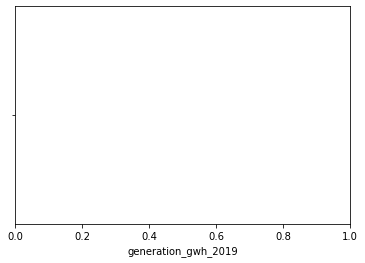

In [22]:
for i in sk:
    sns.boxplot(df[i])
    plt.show()

# Observation

longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 might have outliers

# Bivariate Analysis

In [25]:
gb1=df.groupby('primary_fuel')['geolocation_source'].value_counts()
gb1

primary_fuel  geolocation_source                  
Biomass       WRI                                      50
Coal          WRI                                     258
Gas           WRI                                      69
Hydro         WRI                                     251
Nuclear       WRI                                       9
Oil           WRI                                      20
Solar         Industry About                          119
              National Renewable Energy Laboratory      4
Wind          WRI                                     108
Name: geolocation_source, dtype: int64

# observation

most of primary fuel has WRI has Geolocation Source

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

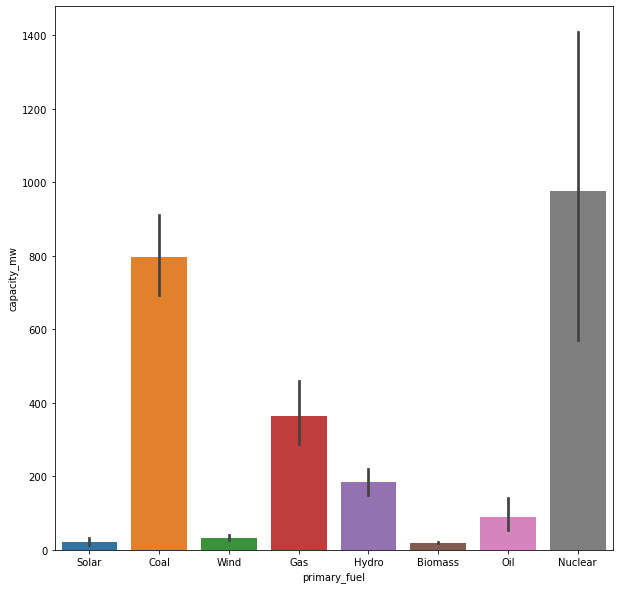

In [32]:
plt.figure(figsize=(10,10))
sns.barplot(df['primary_fuel'],df['capacity_mw'])

# Observation

Nuclear and Coal has higher capacity mw 

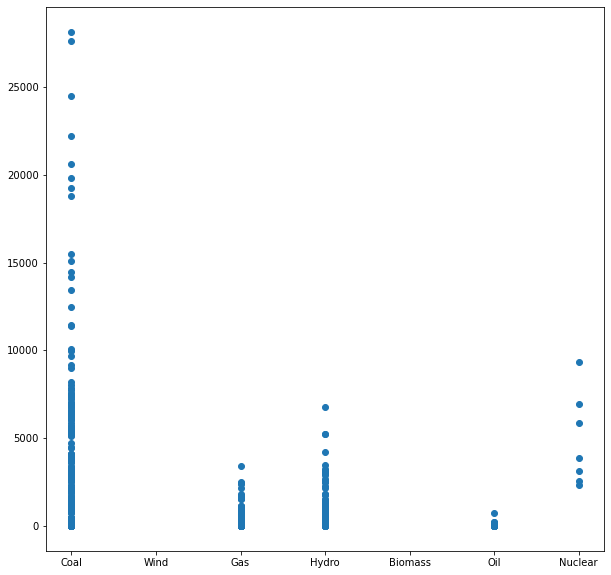

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(df['primary_fuel'],df['generation_gwh_2014'])

# Observation

Coal has highest gwh generation in 2014

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

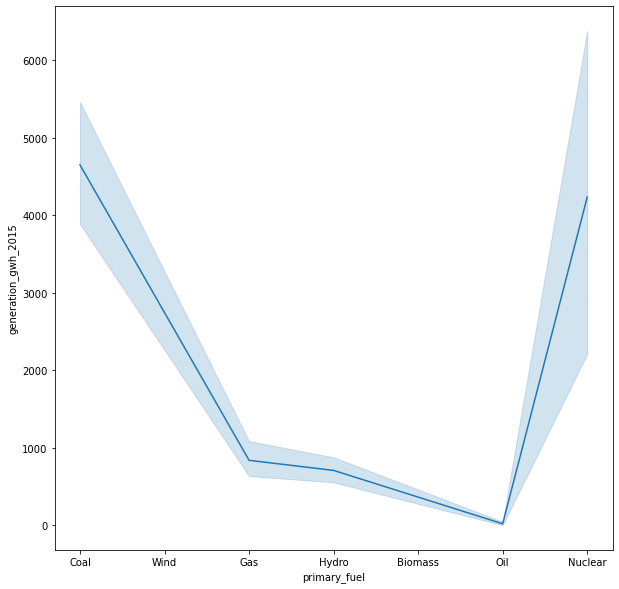

In [35]:
plt.figure(figsize=(10,10))
sns.lineplot(df['primary_fuel'],df['generation_gwh_2015'])

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

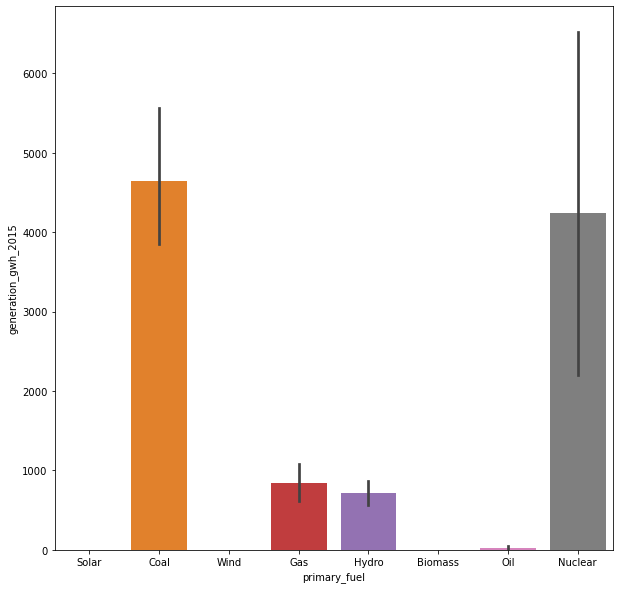

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(df['primary_fuel'],df['generation_gwh_2015'])

# observations

Coal and Nucler has highest gwh generation in 2015

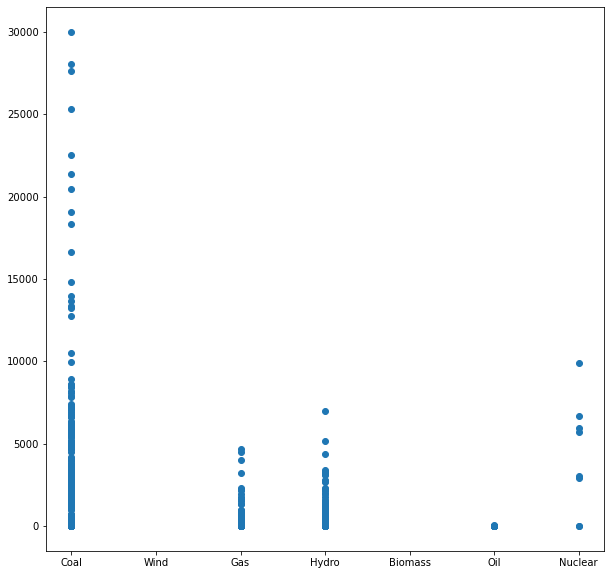

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(df['primary_fuel'],df['generation_gwh_2016'])

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

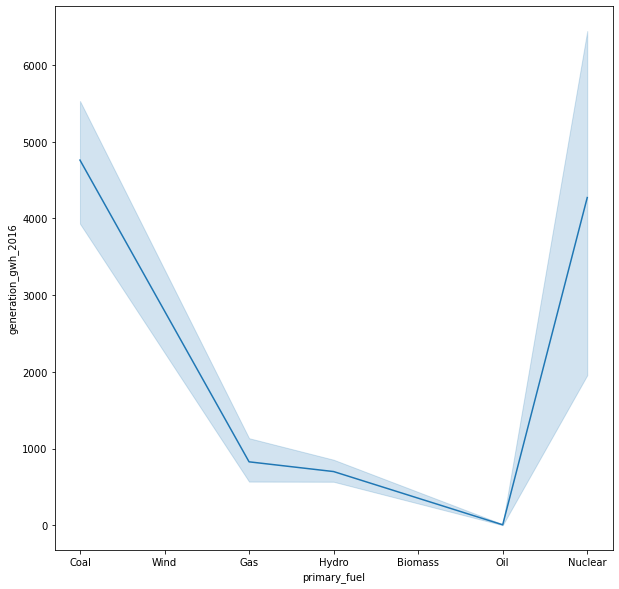

In [38]:
plt.figure(figsize=(10,10))
sns.lineplot(df['primary_fuel'],df['generation_gwh_2016'])

# Observation

Coal and nuclear has highest gwh generation in 2016

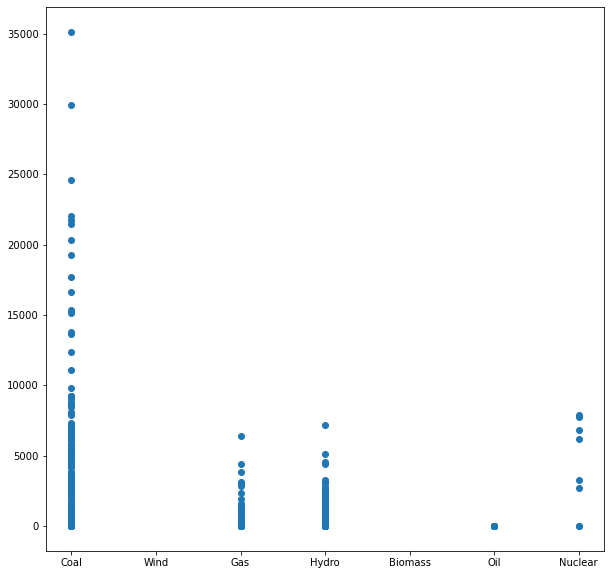

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(df['primary_fuel'],df['generation_gwh_2017'])

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

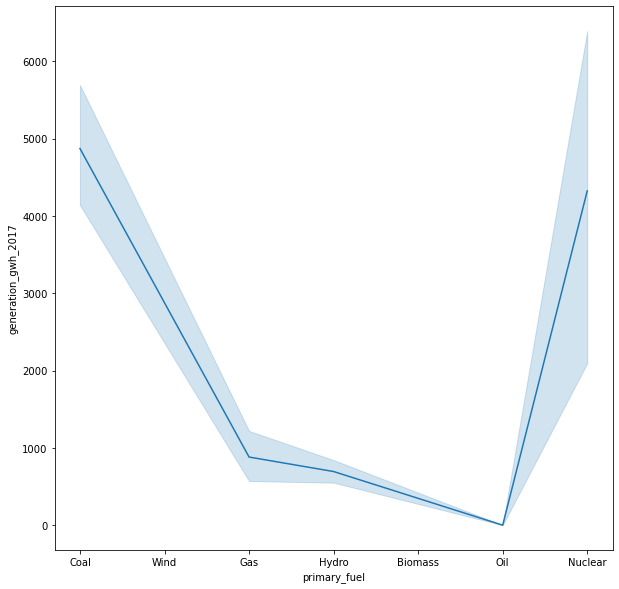

In [40]:
plt.figure(figsize=(10,10))
sns.lineplot(df['primary_fuel'],df['generation_gwh_2017'])

# Observation

Coal and Nuclear has highest gwh generation in 2017

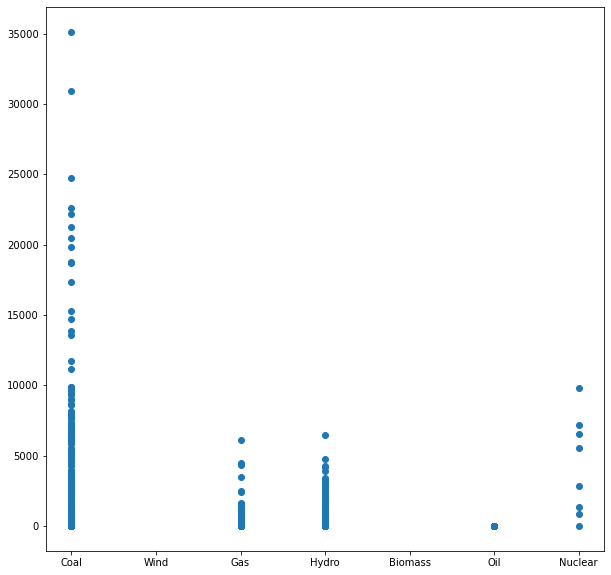

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(df['primary_fuel'],df['generation_gwh_2018'])

# Observation

Coal has Higher gwh in 2018

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

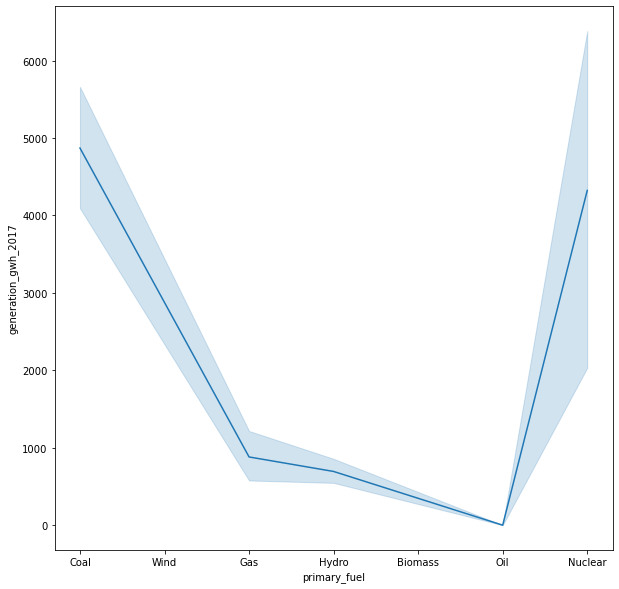

In [42]:
plt.figure(figsize=(10,10))
sns.lineplot(df['primary_fuel'],df['generation_gwh_2017'])

# Observation

Coal and Nuclear has highest gwh generation in 2017

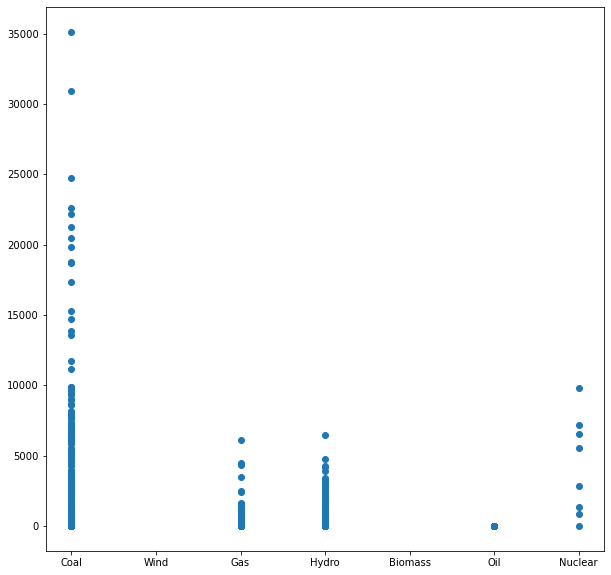

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(df['primary_fuel'],df['generation_gwh_2018'])

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

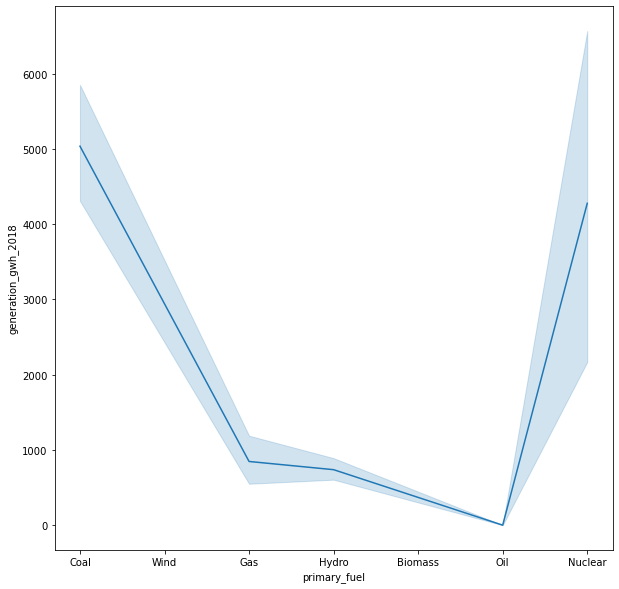

In [44]:
plt.figure(figsize=(10,10))
sns.lineplot(df['primary_fuel'],df['generation_gwh_2018'])

# Observation

Coal and Nuclear has highest gwh generation in 2019

# Overall coal top's higher gwh generation in all these years

In [45]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

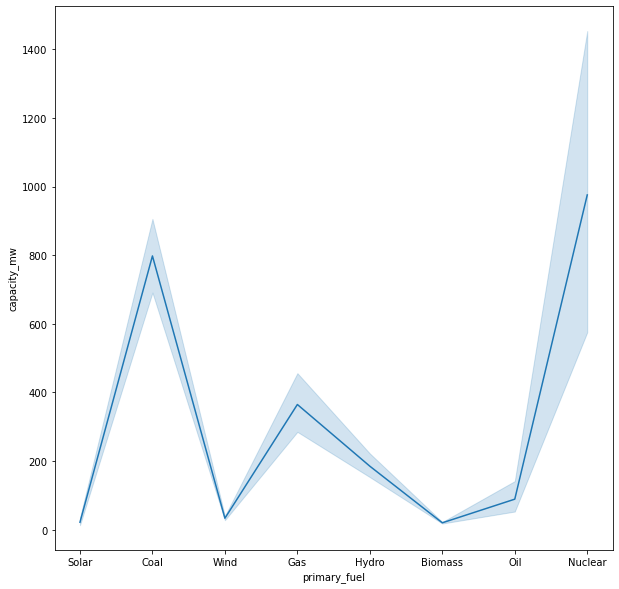

In [46]:
plt.figure(figsize=(10,10))
sns.lineplot(df['primary_fuel'],df['capacity_mw'])

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

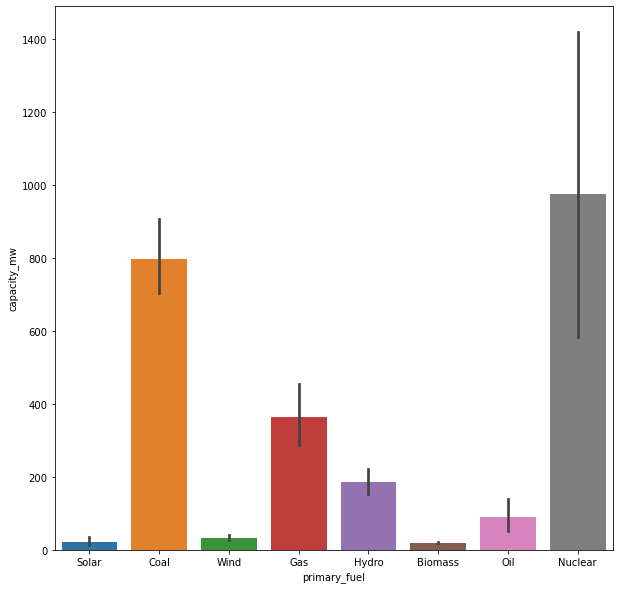

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(df['primary_fuel'],df['capacity_mw'])

# Observation

Nuclear and Coal has higest capacity mw

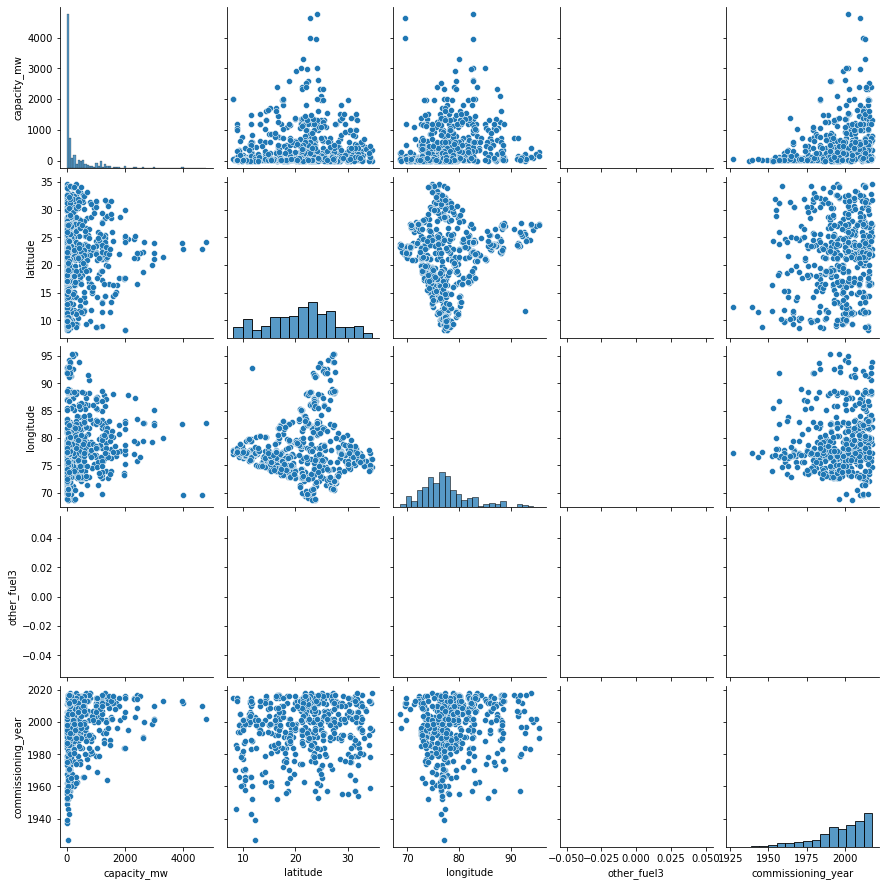

In [55]:
sns.pairplot(df.iloc[:,0:15])

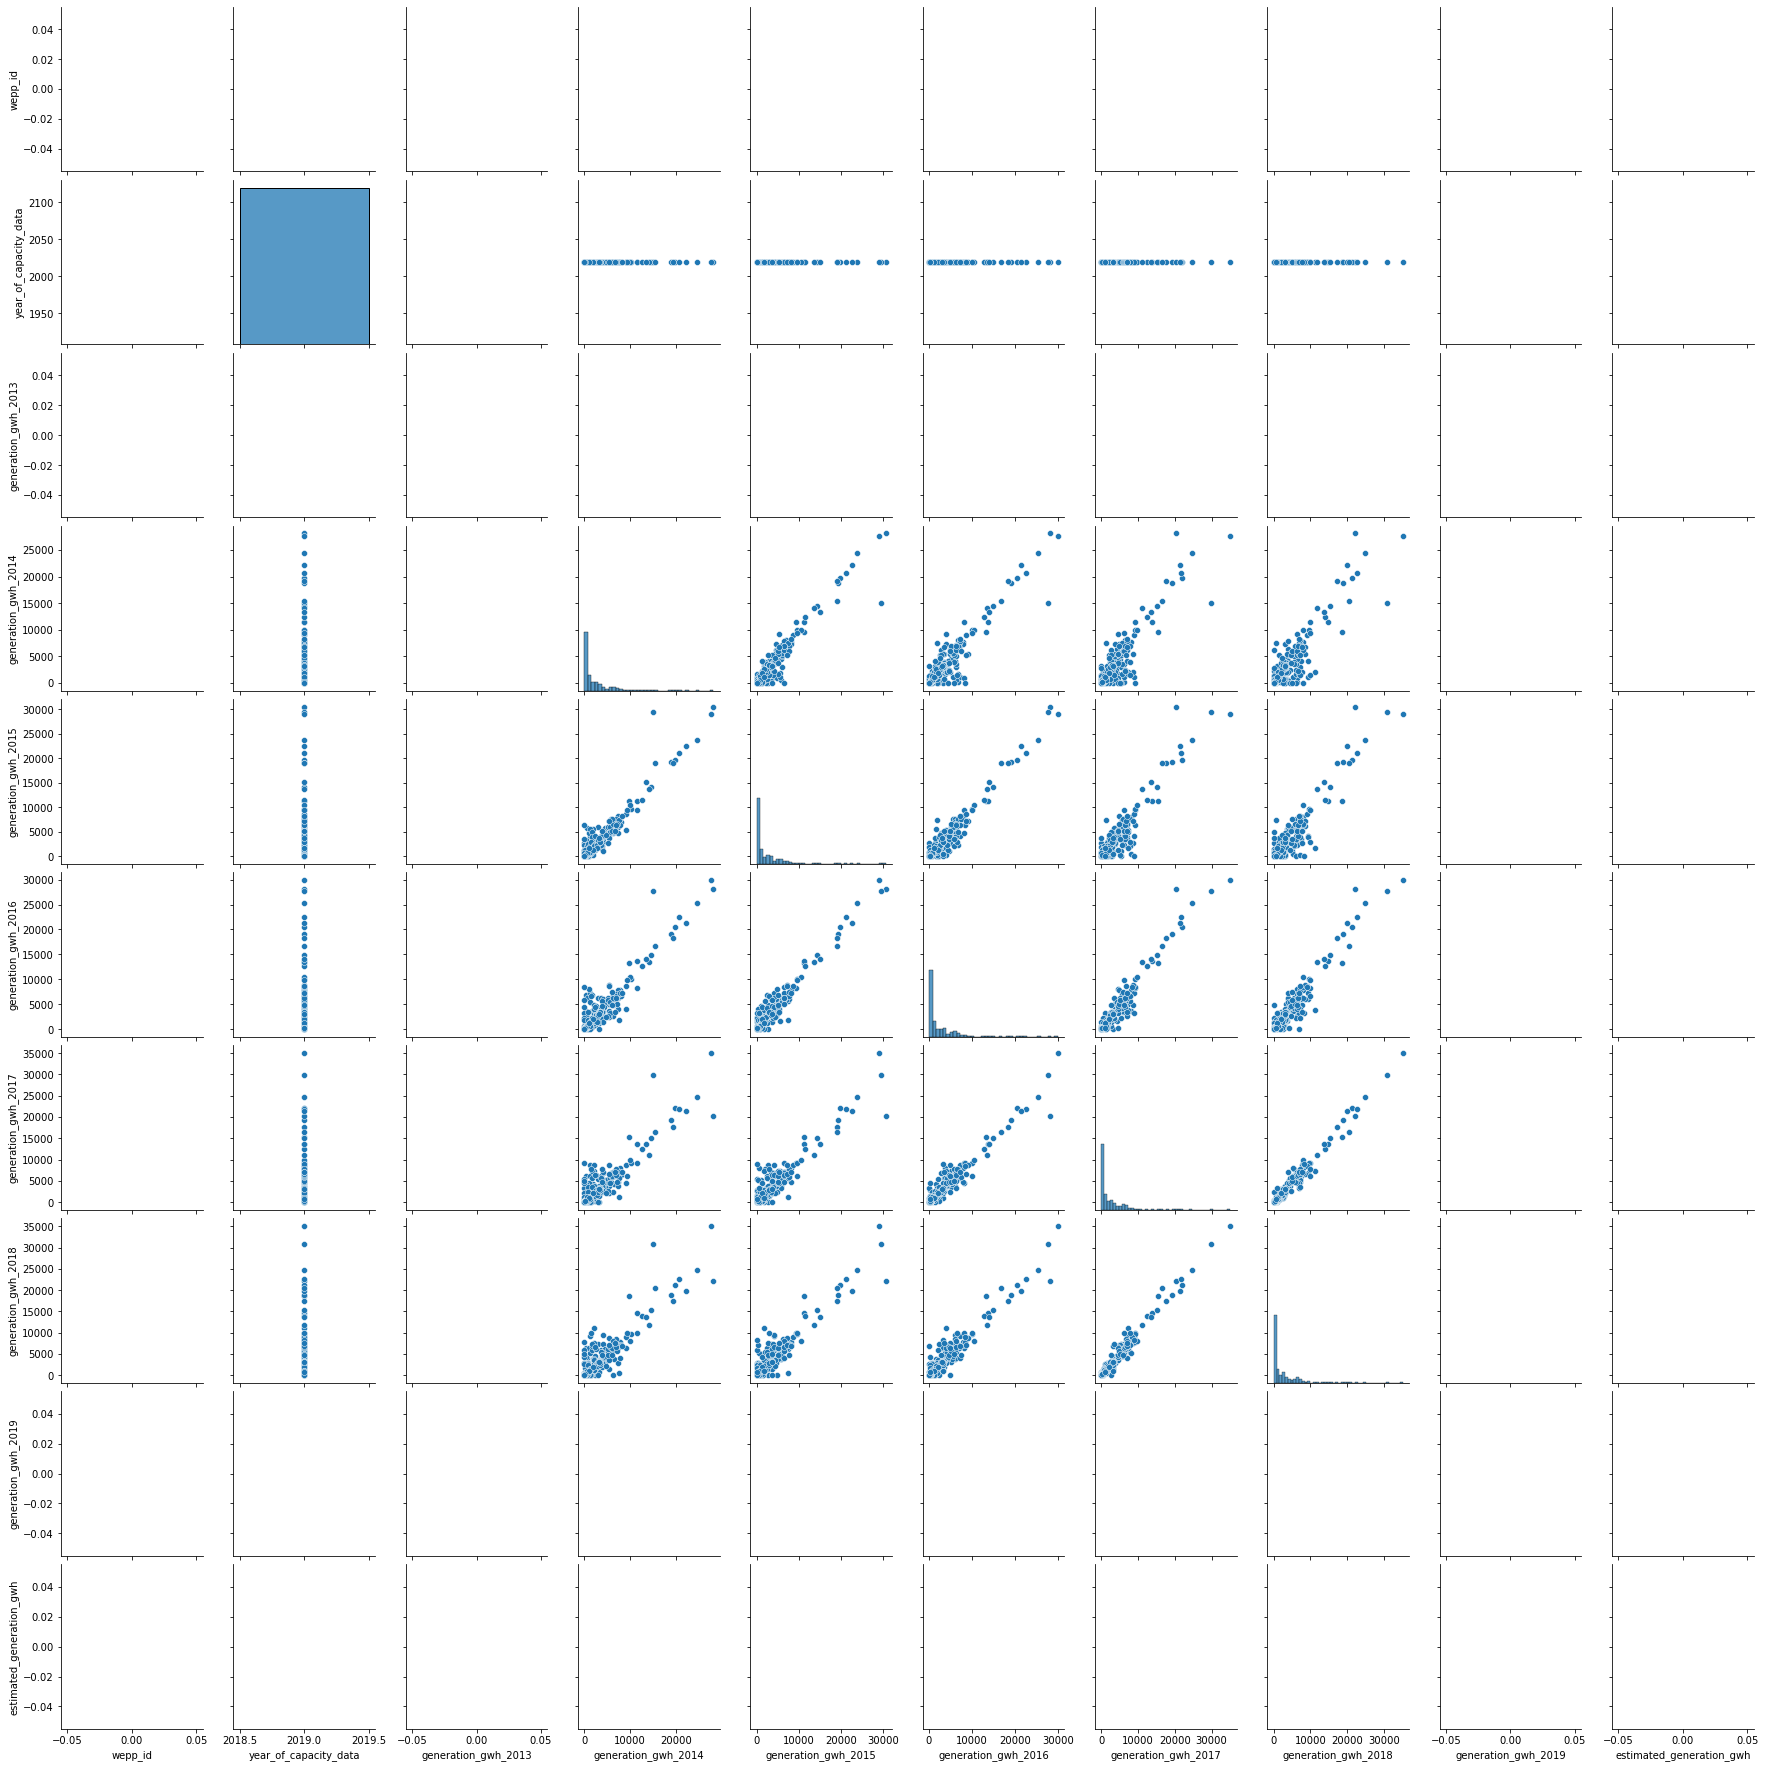

In [56]:
sns.pairplot(df.iloc[:,15:30])

# Observation

generation_gwh_2014 is positively correlated with generation_gwh_2018,generation_gwh_2017,generation_gwh_2016 and generation_gwh_2015

generation_gwh_2015 is positively correlated with generation_gwh_2018,generation_gwh_2017,generation_gwh_2016,generation_gwh_2014

generation_gwh_2016 is positively correlated with generation_gwh_2018,generation_gwh_2017,generation_gwh_2015,generation_gwh_2014

generation_gwh_2017 is positively correlated with generation_gwh_2018,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014

# Encoding

In [18]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [17]:
df.dtypes

country                   float64
name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1               float64
commissioning_year        float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
dtype: object

# Observation

since both country and country long both represent india i will drop one

In [27]:
df.drop(["country_long"],inplace=True,axis=1)

In [28]:
ordinal = ["country","name","gppd_idnr","other_fuel1","owner","source","url","geolocation_source","generation_data_source"]

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [30]:
le = LabelEncoder()
oe = OrdinalEncoder()

for ordi in ordinal:
    df[ordi] = oe.fit_transform(df[ordi].values.reshape(-1,1))
    
df["primary_fuel"] = le.fit_transform(df["primary_fuel"].values.reshape(-1,1))

In [31]:
df.dtypes

country                   float64
name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1               float64
commissioning_year        float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
dtype: object

# Observation

we have succesfully converted all object data to numeric data

# Correlation

<AxesSubplot:>

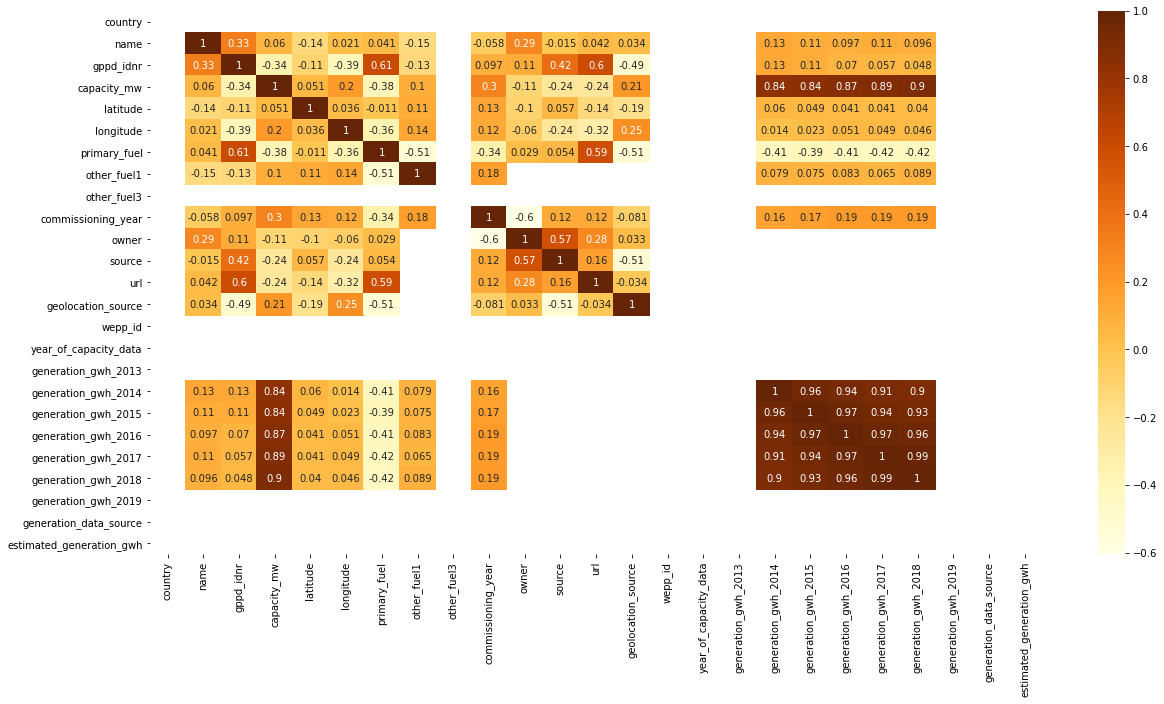

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr")

In [69]:
df.corr()["primary_fuel"].sort_values(ascending=False)

primary_fuel                1.000000
gppd_idnr                   0.609180
url                         0.589886
source                      0.053613
name                        0.040753
owner                       0.029387
latitude                   -0.010530
commissioning_year         -0.336501
longitude                  -0.359060
capacity_mw                -0.380395
generation_gwh_2015        -0.393335
generation_gwh_2014        -0.405019
generation_gwh_2016        -0.408951
generation_gwh_2018        -0.421518
generation_gwh_2017        -0.421736
geolocation_source         -0.511180
other_fuel1                -0.514135
country                          NaN
other_fuel3                      NaN
wepp_id                          NaN
year_of_capacity_data            NaN
generation_gwh_2013              NaN
generation_gwh_2019              NaN
generation_data_source           NaN
estimated_generation_gwh         NaN
Name: primary_fuel, dtype: float64

# observation

primary_fuel and gppd_idnr has postive correlation

primary_fuel and url has positve correlation

primary_fuel and other fuel1 have negative correlaion

primary_fuel and geolocation_source,generatio_gwh_2017,generation_gwh_2018,generation_gwh_2016,generation_gwh_2014,generation_gwh_2015 has negative correlation

<AxesSubplot:xlabel='primary_fuel', ylabel='gppd_idnr'>

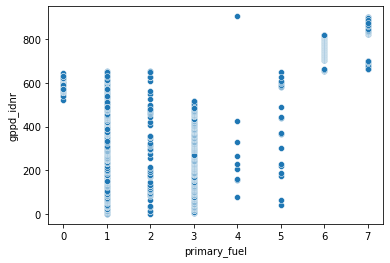

In [70]:
sns.scatterplot(df['primary_fuel'],df['gppd_idnr'])

<AxesSubplot:xlabel='primary_fuel', ylabel='other_fuel1'>

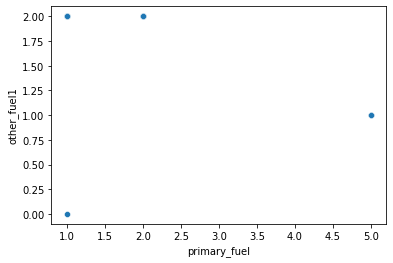

In [71]:
sns.scatterplot(df['primary_fuel'],df['other_fuel1'])

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

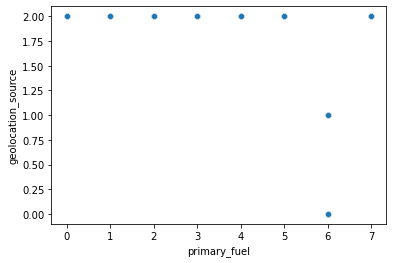

In [72]:
sns.scatterplot(df['primary_fuel'],df['geolocation_source'])

# Skewness

In [32]:
dc1 = df.drop(["country","name","gppd_idnr","other_fuel1","owner","source","url","geolocation_source","generation_data_source","primary_fuel"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

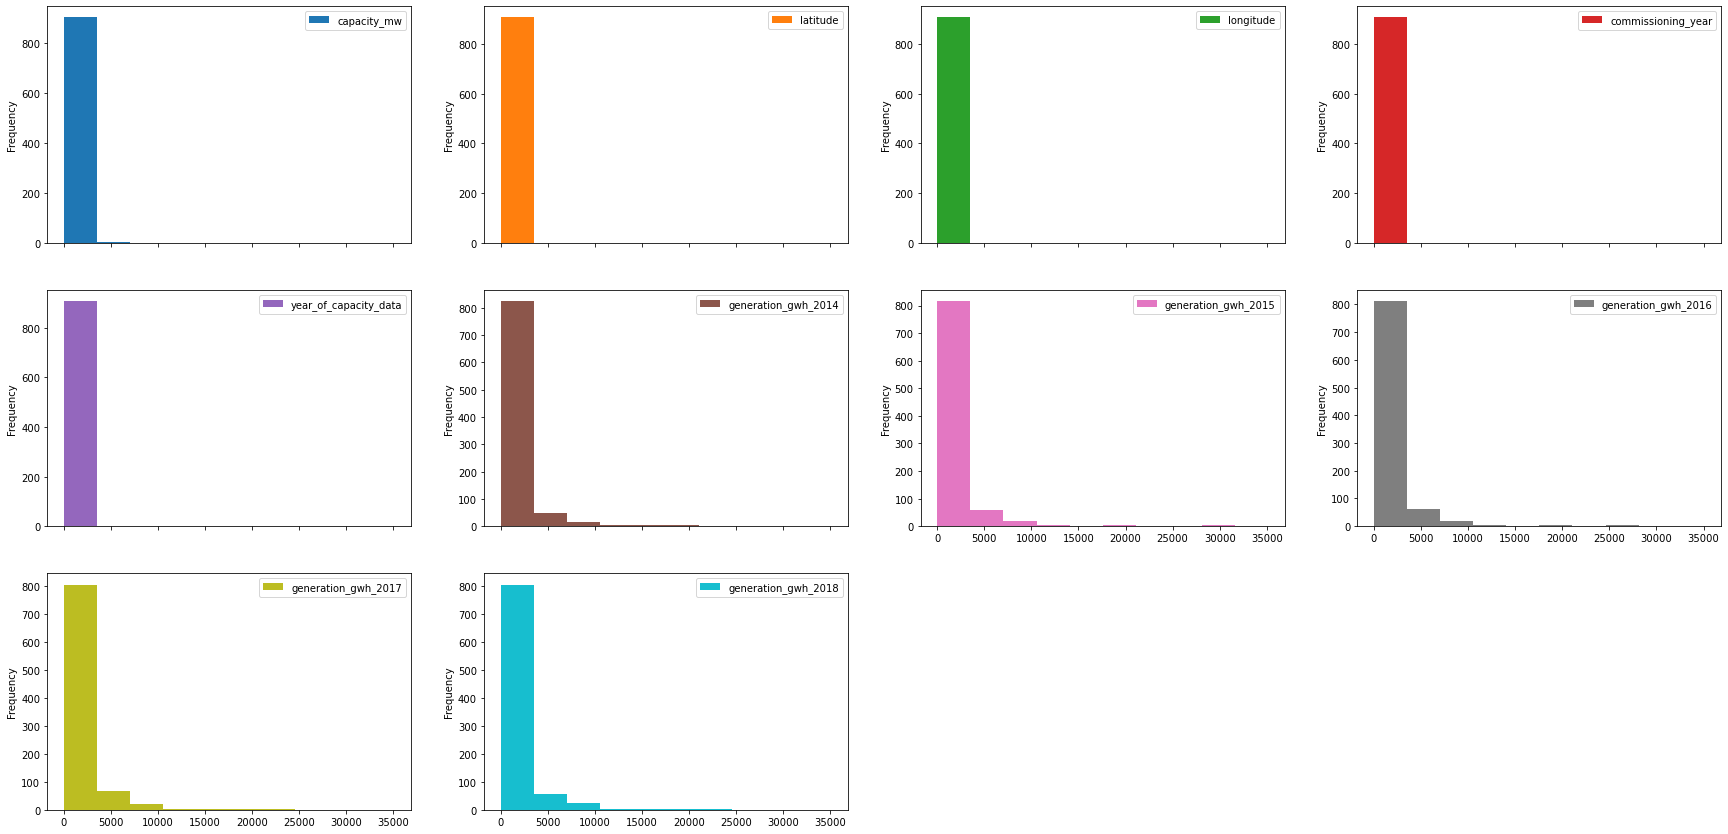

In [33]:
dc1.plot(kind="hist",subplots=True,layout=(4,4),figsize=(30,20))

In [29]:
dc1.skew().sort_values(ascending=False)

generation_gwh_2015      5.364134
generation_gwh_2017      5.110952
generation_gwh_2016      5.068427
generation_gwh_2014      5.035446
generation_gwh_2018      4.937907
capacity_mw              3.123576
longitude                1.141881
year_of_capacity_data    0.000000
latitude                -0.149698
commissioning_year      -1.399359
dtype: float64

# observation

almost all features have skewness so lets proceed with power transform to remove skewness

# Using power_transform for skewness removal

In [35]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [36]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)

In [37]:
dc2.skew()

capacity_mw              0.022164
latitude                -0.074269
longitude                0.002926
commissioning_year      -0.080999
year_of_capacity_data    0.000000
generation_gwh_2014      0.123226
generation_gwh_2015      0.074582
generation_gwh_2016      0.041821
generation_gwh_2017      0.018337
generation_gwh_2018      0.000783
dtype: float64

# observation

we have removed skewness

# outlier removal

capacity_mw                 AxesSubplot(0.125,0.125;0.065678x0.755)
latitude                 AxesSubplot(0.203814,0.125;0.065678x0.755)
longitude                AxesSubplot(0.282627,0.125;0.065678x0.755)
commissioning_year       AxesSubplot(0.361441,0.125;0.065678x0.755)
year_of_capacity_data    AxesSubplot(0.440254,0.125;0.065678x0.755)
generation_gwh_2014      AxesSubplot(0.519068,0.125;0.065678x0.755)
generation_gwh_2015      AxesSubplot(0.597881,0.125;0.065678x0.755)
generation_gwh_2016      AxesSubplot(0.676695,0.125;0.065678x0.755)
generation_gwh_2017      AxesSubplot(0.755508,0.125;0.065678x0.755)
generation_gwh_2018      AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

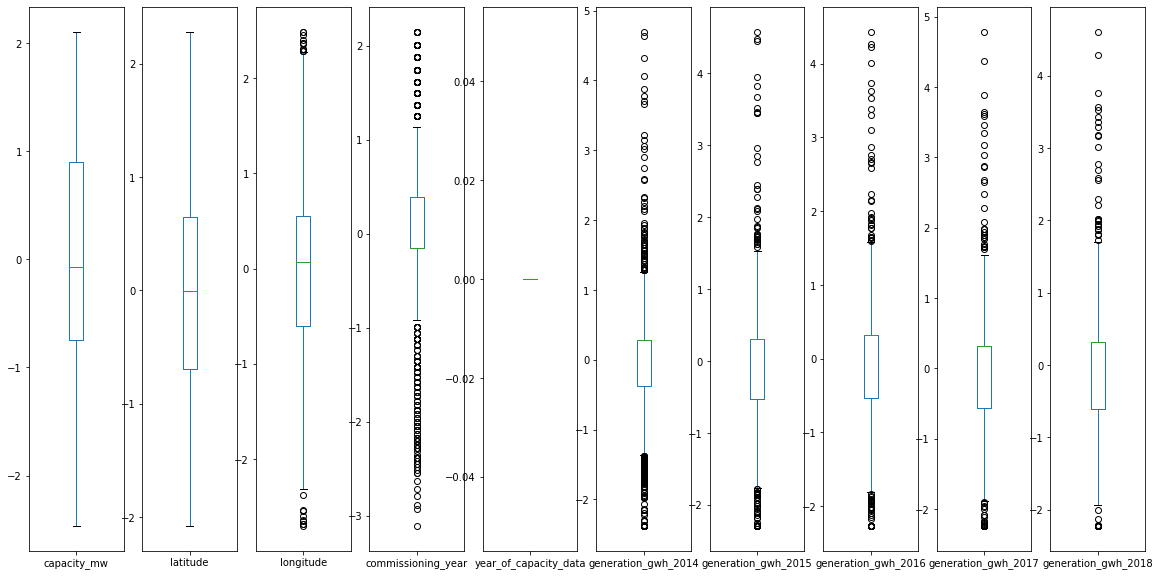

In [38]:
dc2.plot(kind="box",subplots=True,figsize=(20,10))

In [39]:
dc2.shape

(907, 10)

In [34]:
from scipy.stats import zscore

In [35]:
z = np.abs(zscore(dc2))

In [36]:
np.where(z>3)

(array([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880], dtype=int64),
 array([9, 5, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9,
        5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 5, 5, 6, 7, 8, 9, 3, 5, 6, 7, 8, 9,
        5, 6, 7, 8, 9, 5, 6, 7, 8, 9], dtype=int64))

In [37]:
df1 = dc2.drop([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880],axis=0)
df1.shape

(893, 10)

# observation

the outliers are removed

# data loss

In [38]:
((907-893)/907)*100

1.5435501653803747

# observation

1.5 % Data loss

# creating categorical data dataframe

In [39]:
dfc = pd.DataFrame()
dfc["name"] = df["name"]
dfc["country"] = df["country"]
dfc["gppd_idnr"] = df["gppd_idnr"]
dfc["other_fuel1"] =df["other_fuel1"]
dfc["owner"] = df["owner"]
dfc["source"] = df["source"]
dfc["url"] = df["url"]
dfc["geolocation_source"] = df["geolocation_source"]
dfc["generation_data_source"] = df["generation_data_source"]
dfc["primary_fuel"] = df["primary_fuel"]
dfc.shape

(907, 10)

# removing the outlier removed rows in categorical dataframe

In [40]:
dfc.drop([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880],axis=0,inplace=True)

In [41]:
dfc.shape

(893, 10)

# Balancing the data

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

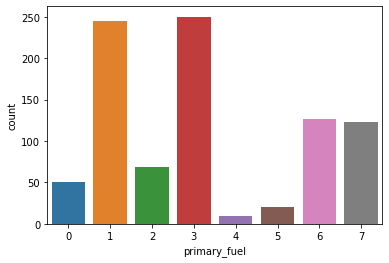

In [78]:
sns.countplot(dfc.iloc[:,-1])

# observation

data imbalance is found so removing them by SMOTE

In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [52]:
dfb = df1.join(dfc)
dx = dfb.drop("primary_fuel",axis=1)
dy = dfc.iloc[:,-1]

In [53]:
dft,y = sm.fit_resample(dx,dy)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

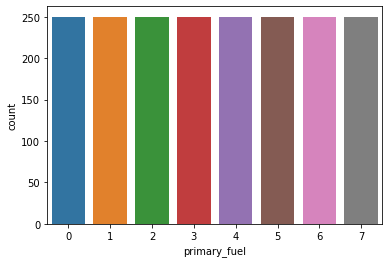

In [79]:
sns.countplot(y)

# observation

now we have removed data imbalance by SMOTE

# Multicolinearity Checking

# variance inflation factor

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(19)]
vif["feature names"] = dft.columns

In [56]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
13,26.958387,other_fuel1
12,20.817506,gppd_idnr
17,15.522253,geolocation_source
7,14.187494,generation_gwh_2016
9,11.490068,generation_gwh_2018
6,9.957771,generation_gwh_2015
15,7.223585,source
14,7.152402,owner
16,6.487487,url
10,6.211431,name


# observation

other fuel has high vif index so dropping it

In [57]:
dft.drop("other_fuel1",axis=1,inplace=True)

In [58]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(18)]
vif["feature names"] = dft.columns

In [59]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
12,14.744392,gppd_idnr
7,14.176467,generation_gwh_2016
9,11.397524,generation_gwh_2018
6,9.897556,generation_gwh_2015
16,6.403980,geolocation_source
13,6.357354,owner
15,6.357021,url
10,6.206632,name
14,5.825517,source
8,5.168719,generation_gwh_2017


# observation

gppd_idnr has high vif index so dropping it

In [60]:
dft.drop("gppd_idnr",axis=1,inplace=True)

In [61]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(17)]
vif["feature names"] = dft.columns

In [62]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
7,14.176446,generation_gwh_2016
9,11.335616,generation_gwh_2018
6,9.845957,generation_gwh_2015
12,6.340631,owner
15,6.276304,geolocation_source
13,5.606201,source
8,5.124331,generation_gwh_2017
5,4.945015,generation_gwh_2014
14,4.432904,url
10,3.853094,name


# Observation

generation_gwh_2016 has higher vif index so dropping it

In [63]:
dft.drop("generation_gwh_2016",axis=1,inplace=True)

In [69]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(16)]
vif["feature names"] = dft.columns

In [70]:
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
8,9.156927,generation_gwh_2018
6,7.439107,generation_gwh_2015
11,6.340193,owner
14,6.272069,geolocation_source
12,5.606144,source
5,4.944618,generation_gwh_2014
7,4.525976,generation_gwh_2017
13,4.423009,url
9,3.843595,name
0,2.052733,capacity_mw


# observaiton

now vif index is within limit so mulitcollinearity is removed from this data set

Multicolinearity Removed

# Standard Scaler

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc = StandardScaler()
x = sc.fit_transform(dft)
x_final= pd.DataFrame(x,columns=dft.columns)

In [73]:
x_final.shape

(2000, 16)

# observation

we have scaled the input data

# model Training starts

# Importing required libraries

In [74]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# i have write a code block that tests data with models and rank them according to cross val score and accuracy score

In [76]:
algo = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
result = pd.DataFrame(columns=["Algorithm Name","Accuracy Score","Cross Validation Score"])

dtc=[]
knc=[]
rfc=[]
abc=[]
fl = [dtc,knc,rfc,abc]

oo=0


for i in algo:
    acc=0
    rand=0
    
    for ii in range(0,100):
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=ii)
        cf = i
        cf.fit(train_x,train_y)
        pred = cf.predict(test_x)
        ac = accuracy_score(test_y,pred)
        if ac>acc:
            acc=ac
            rand=ii
    print(f' the best random state is {rand} and accuracy score is {acc} for algorithm {i}')
    
    
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=rand)
    cf = i
    cf.fit(train_x,train_y)
    pred = cf.predict(test_x)
    ac = accuracy_score(test_y,pred)
    cv = cross_val_score(cf,x_final,y,cv=5).mean()
    fl[oo].insert(0,i)
    fl[oo].insert(1,ac)
    fl[oo].insert(2,cv)
    result.loc[oo] = fl[oo]
    oo +=1
    
    
final_result = result.sort_values(by=["Accuracy Score","Cross Validation Score"],ascending=False)    

 the best random state is 72 and accuracy score is 0.9225 for algorithm DecisionTreeClassifier()
 the best random state is 72 and accuracy score is 0.9225 for algorithm KNeighborsClassifier()
 the best random state is 43 and accuracy score is 0.9525 for algorithm RandomForestClassifier()
 the best random state is 43 and accuracy score is 0.9525 for algorithm AdaBoostClassifier()


In [80]:
final_result

,Algorithm Name,Accuracy Score,Cross Validation Score
2,"(DecisionTreeClassifier(max_features='auto', r...",0.9400,0.9095
0,DecisionTreeClassifier(),0.9050,0.8520
1,KNeighborsClassifier(),0.8450,0.8370
3,"(DecisionTreeClassifier(max_depth=1, random_st...",0.3675,0.3640


In [81]:
final_result.loc[2]["Algorithm Name"]

RandomForestClassifier()

# running Support vector classifier induvidually as it consumes more memory

In [82]:
svc = SVC()
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=10)
svc.fit(train_x,train_y)
pred = svc.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(svc,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} for SVC' )

 the accuracy socre is 0.9025, the cross validation score is 0.8545 for SVC


# Observation

from all the classifier models random forest performed best with accuracy of 94 % and cross val score of 90 %

# HyperParameter Tunining

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
rf = RandomForestClassifier()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 90, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=47)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 90, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600]})

In [85]:
gsv.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

# using the best parameters got in grid search 

In [86]:
rf = RandomForestClassifier(bootstrap=False,max_depth=20,max_features='auto',min_samples_leaf=1,n_estimators=600,min_samples_split=2)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=47)
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
ac = accuracy_score(test_y,pred)
cv = cross_val_score(rf,x_final,y,cv=5).mean()
print(f' the accuracy socre is {ac}, the cross validation score is {cv} ' )

 the accuracy socre is 0.9275, the cross validation score is 0.9110000000000001 


# Observation

# The accuracy score is 92% and cross val score is 91% 

In [93]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.91      0.74      0.81        53
           2       0.84      0.94      0.89        50
           3       0.87      0.89      0.88        53
           4       0.98      0.98      0.98        53
           5       0.94      0.92      0.93        52
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        46

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [94]:
print(confusion_matrix(test_y,pred))

[[46  1  0  0  0  0  0  0]
 [ 4 39  5  3  1  1  0  0]
 [ 0  1 47  0  0  2  0  0]
 [ 0  2  4 47  0  0  0  0]
 [ 0  0  0  1 52  0  0  0]
 [ 1  0  0  3  0 48  0  0]
 [ 0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0 46]]


# saving the model

In [95]:
import joblib
joblib.dump(rf,"Global Power Plant primary fuel.pkl")

['Global Power Plant primary fuel.pkl']

# Predicting the capacity mw

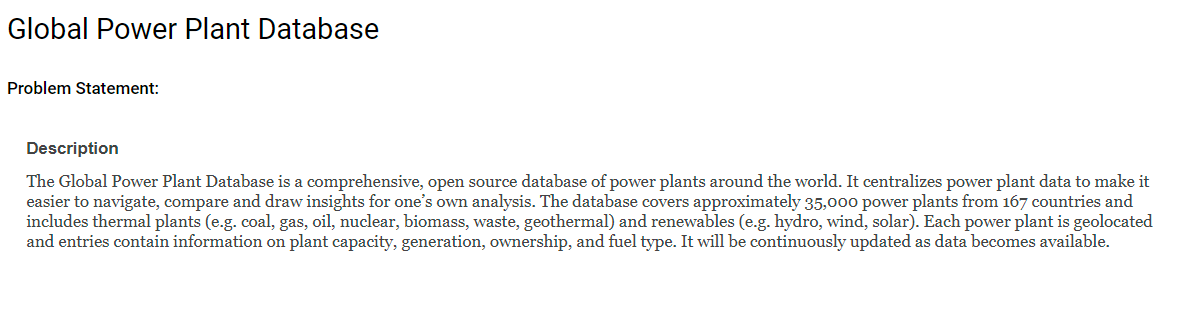

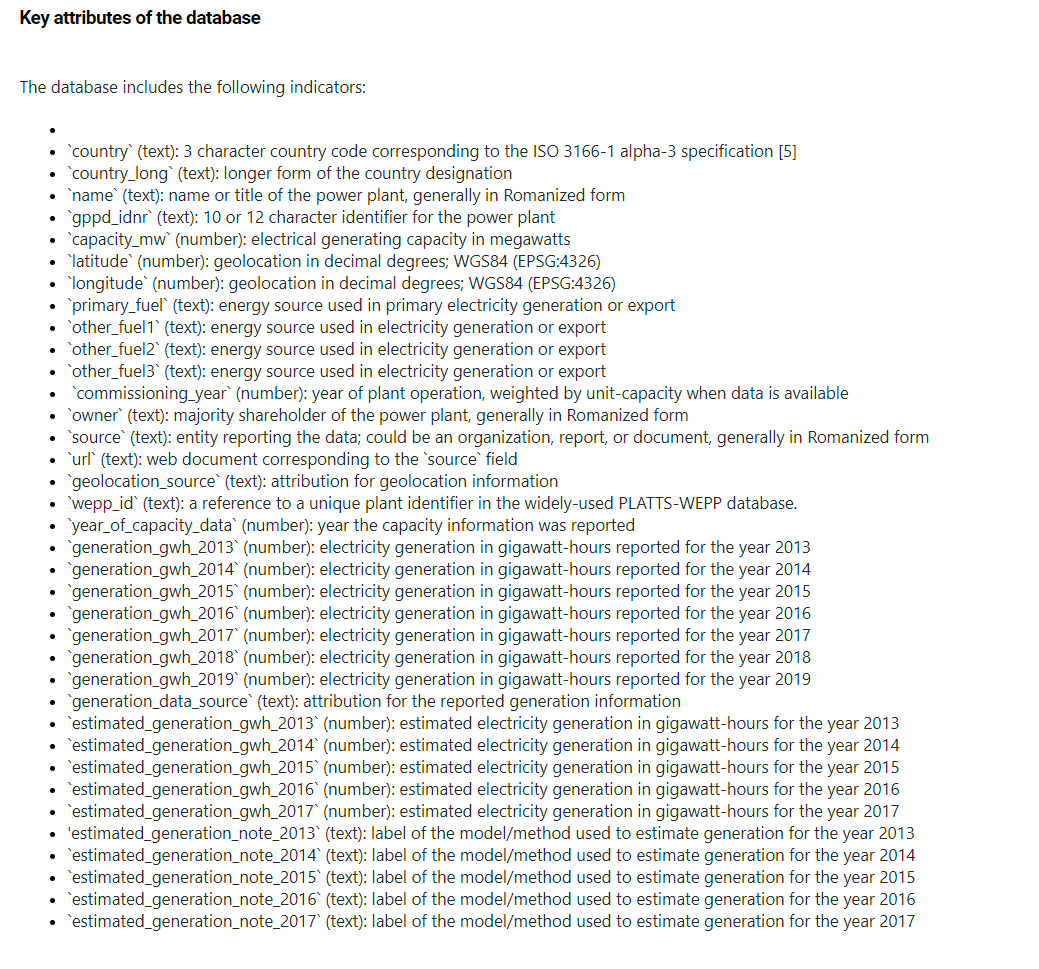

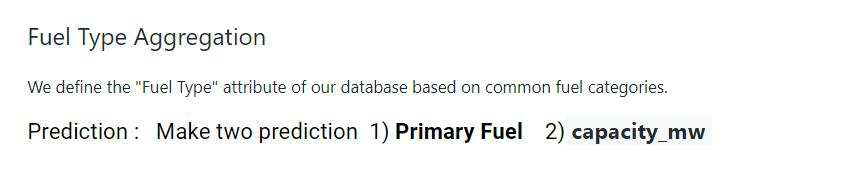

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv("database_IND.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [42]:
df = pd.read_csv("database_IND.csv") 

In [43]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,NaN,NaN,iEnergy Wind Farms,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV134503...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.shape

(907, 27)

# i am going to use all techniques i used earlier on this dataset but considering capacity_mw as target variable

# null value check

<AxesSubplot:>

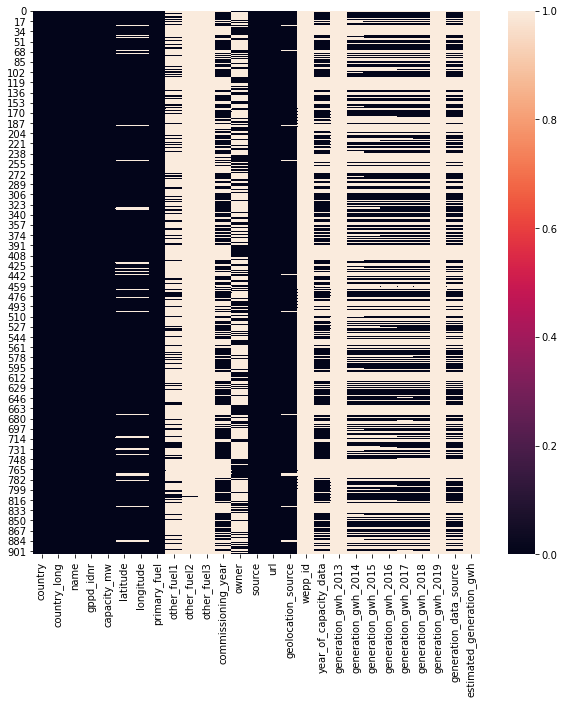

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [9]:
df.shape

(907, 27)

# observation

we can see that estimated_generation_gwh,generation_gwh_2019,wepp_id,other_fuel3,and other_fuel2  has all values with null only so dropping it

In [10]:
df.drop(["estimated_generation_gwh","generation_gwh_2019","generation_gwh_2013","wepp_id","other_fuel3","other_fuel2"],inplace=True,axis=1)

# Null value treatment

In [11]:
from sklearn.impute import SimpleImputer
numerical=["latitude","longitude","commissioning_year","year_of_capacity_data","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]
categorical=["other_fuel1","owner","geolocation_source","generation_data_source"]

In [12]:
sii = SimpleImputer(strategy = "mean")
siii = SimpleImputer(strategy= "most_frequent")
for num in numerical:
    df[num] = sii.fit_transform(df[num].values.reshape(-1,1))
    
    
for cat in categorical:
    df[cat]  = siii.fit_transform(df[cat].values.reshape(-1,1))


In [13]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# observation

null values are removed

# Encoding

In [14]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [15]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [16]:
df["country_long"].unique().sum()

'India'

In [17]:
df["country"].unique().sum()

'IND'

# Observation

since both country and country long both represent india i will drop one

In [23]:
df.drop(["country_long"],inplace=True,axis=1)

In [19]:
ordinal = ["country","name","gppd_idnr","other_fuel1","owner","source","url","geolocation_source","generation_data_source","primary_fuel"]

In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

for ordi in ordinal:
    df[ordi] = oe.fit_transform(df[ordi].values.reshape(-1,1))

In [24]:
df.dtypes

country                   float64
name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel              float64
other_fuel1               float64
commissioning_year        float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
dtype: object

# observation

we have successfully converted object data to numeric data

# Skewness Check

In [25]:
dc1 = df.drop(["country","name","gppd_idnr","other_fuel1","owner","source","url","geolocation_source","generation_data_source","primary_fuel","capacity_mw"],axis=1)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

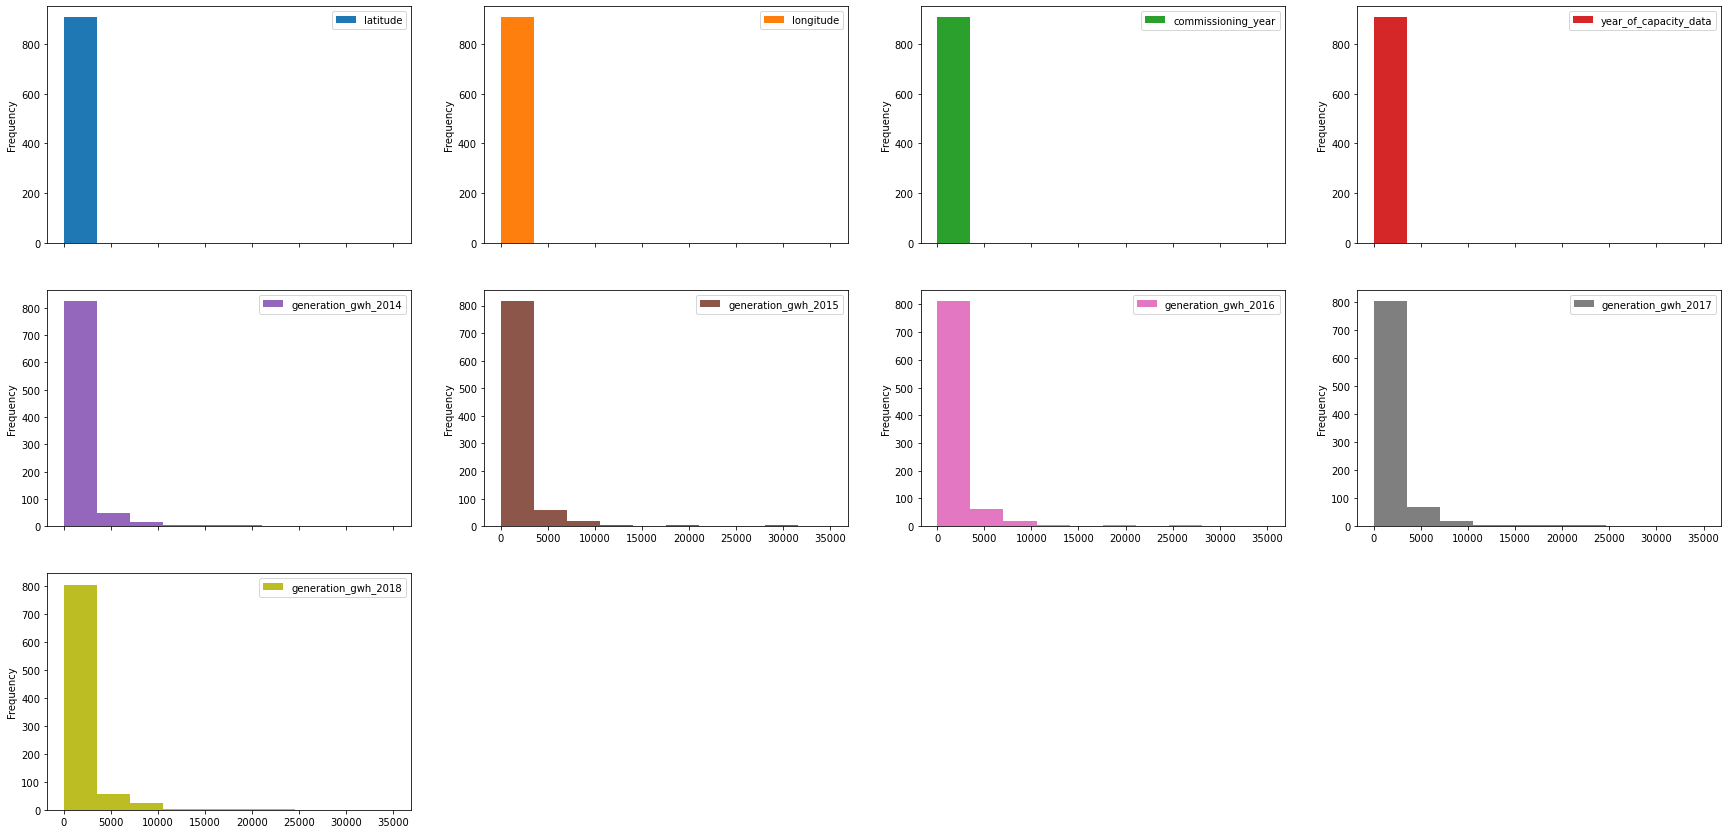

In [26]:
dc1.plot(kind="hist",subplots=True,layout=(4,4),figsize=(30,20))

In [27]:
dc1.skew().sort_values(ascending=False)

generation_gwh_2015      5.364134
generation_gwh_2017      5.110952
generation_gwh_2016      5.068427
generation_gwh_2014      5.035446
generation_gwh_2018      4.937907
longitude                1.141881
year_of_capacity_data    0.000000
latitude                -0.149698
commissioning_year      -1.399359
dtype: float64

# Observation

almost all features have skewness so lets proceed with power transform to remove skewness

In [28]:
from sklearn.preprocessing import power_transform
dc2 = power_transform(dc1)

In [29]:
dc2 = pd.DataFrame(dc2,columns=dc1.columns)

In [30]:
dc2.skew()

latitude                -0.074269
longitude                0.002926
commissioning_year      -0.080999
year_of_capacity_data    0.000000
generation_gwh_2014      0.123226
generation_gwh_2015      0.074582
generation_gwh_2016      0.041821
generation_gwh_2017      0.018337
generation_gwh_2018      0.000783
dtype: float64

# observation

skewness removed from data

# Outlier check

In [31]:
from scipy.stats import zscore

latitude                    AxesSubplot(0.125,0.125;0.0731132x0.755)
longitude                AxesSubplot(0.212736,0.125;0.0731132x0.755)
commissioning_year       AxesSubplot(0.300472,0.125;0.0731132x0.755)
year_of_capacity_data    AxesSubplot(0.388208,0.125;0.0731132x0.755)
generation_gwh_2014      AxesSubplot(0.475943,0.125;0.0731132x0.755)
generation_gwh_2015      AxesSubplot(0.563679,0.125;0.0731132x0.755)
generation_gwh_2016      AxesSubplot(0.651415,0.125;0.0731132x0.755)
generation_gwh_2017      AxesSubplot(0.739151,0.125;0.0731132x0.755)
generation_gwh_2018      AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

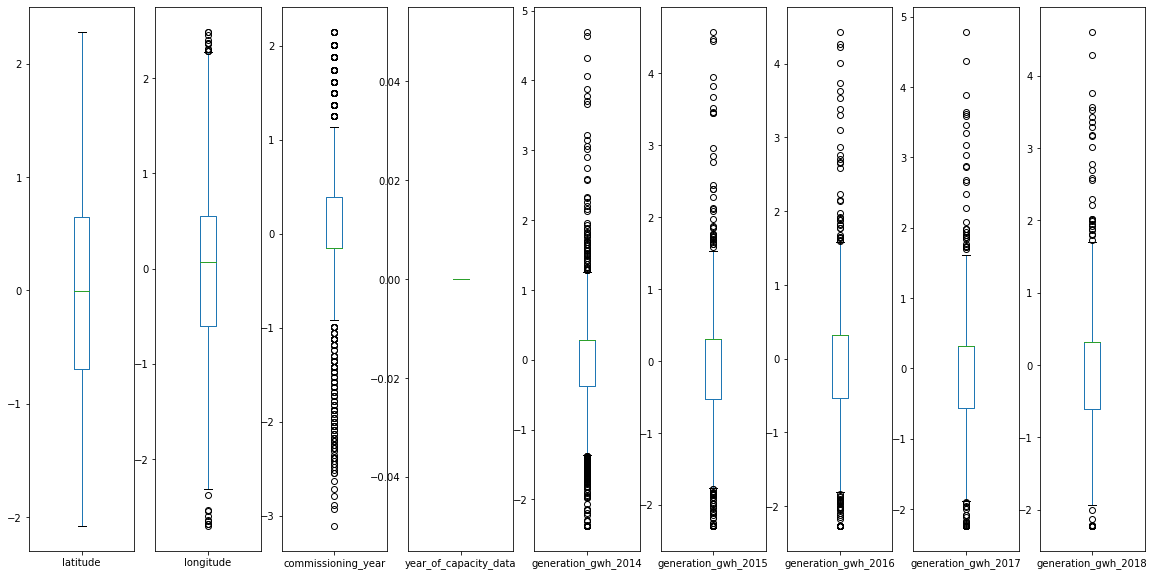

In [32]:
dc2.plot(kind="box",subplots=True,figsize=(20,10))

In [34]:
z = np.abs(zscore(dc2))

In [35]:
np.where(z>3)

(array([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880], dtype=int64),
 array([8, 4, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8,
        4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 4, 4, 5, 6, 7, 8, 2, 4, 5, 6, 7, 8,
        4, 5, 6, 7, 8, 4, 5, 6, 7, 8], dtype=int64))

# outliers found so proceeding for zscore outlier removal

In [36]:
df1 = dc2.drop([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880],axis=0)

In [37]:
df1.shape

(893, 9)

In [38]:
dc2.shape

(907, 9)

# Observation

outliers are removed

# Data Loss

In [39]:
((907-893)/907)*100

1.5435501653803747

# observation

1.54 % Dataloss

# Creating Categorical DataFrame with target variable

In [46]:
dfc = pd.DataFrame()
dfc["name"] = df["name"]
dfc["country"] = df["country"]
dfc["gppd_idnr"] = df["gppd_idnr"]
dfc["other_fuel1"] =df["other_fuel1"]
dfc["owner"] = df["owner"]
dfc["source"] = df["source"]
dfc["url"] = df["url"]
dfc["geolocation_source"] = df["geolocation_source"]
dfc["generation_data_source"] = df["generation_data_source"]
dfc["primary_fuel"] = df["primary_fuel"]
dfc["capacity_mw"] = df["capacity_mw"]
dfc.shape

(907, 11)

# removing outliers rows in Dataframe we created earlier

In [47]:
dfc.drop([ 15, 308, 364, 364, 364, 364, 364, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 695, 695, 695, 695, 695, 721, 726, 726, 726, 726, 726, 728,
        786, 786, 786, 786, 786, 808, 808, 808, 808, 808, 880, 880, 880,
        880, 880],inplace=True,axis=0)

In [48]:
dfc.shape

(893, 11)

# Mulitcolinearity Checking 

# variance inflation factor

In [49]:
dft = df1.join(dfc)
dft.drop("capacity_mw",axis=1,inplace=True)
dft.shape

(893, 19)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(19)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
12,44.743286,other_fuel1
16,22.657336,geolocation_source
11,16.273458,gppd_idnr
18,11.124881,primary_fuel
6,10.738130,generation_gwh_2016
8,10.682618,generation_gwh_2018
7,10.022414,generation_gwh_2017
15,8.253266,url
14,7.548076,source
5,7.360006,generation_gwh_2015


# Observation

other_fuel1 has high vif index so dropping it

In [52]:
dft.drop("other_fuel1",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(18)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
11,14.985320,gppd_idnr
6,10.733913,generation_gwh_2016
8,10.613471,generation_gwh_2018
7,9.997111,generation_gwh_2017
5,7.358798,generation_gwh_2015
14,6.805974,url
17,6.805692,primary_fuel
9,5.431510,name
12,4.980710,owner
13,4.620151,source


# Observation

gppd_idnr have high Vif index so dropping it 

In [53]:
dft.drop("gppd_idnr",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(17)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
6,10.733547,generation_gwh_2016
8,10.612222,generation_gwh_2018
7,9.994290,generation_gwh_2017
5,7.311776,generation_gwh_2015
13,6.433254,url
16,4.773422,primary_fuel
11,4.712792,owner
14,4.606162,geolocation_source
12,4.381819,source
4,4.076830,generation_gwh_2014


# observation

generation_gwh_2016 has higher vif index so droppin it

In [54]:
dft.drop("generation_gwh_2016",axis=1,inplace=True)
vif = pd.DataFrame()
vif["vif value"] = [variance_inflation_factor(dft.values,a) for a in range(16)]
vif["feature names"] = dft.columns
vif.sort_values(by=["vif value"],ascending=False)

,vif value,feature names
7,9.975638,generation_gwh_2018
6,9.273871,generation_gwh_2017
12,6.427629,url
5,4.986658,generation_gwh_2015
15,4.773283,primary_fuel
10,4.711162,owner
13,4.604285,geolocation_source
11,4.381625,source
4,4.063155,generation_gwh_2014
8,3.941667,name


# observation

now vif index is within limit so mulitcollinearity is removed from this data set

# Multicolinearity Removed

# Standard Scaler

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(dft)
x_final= pd.DataFrame(x,columns=dft.columns)

In [57]:
x_final.shape

(893, 16)

In [61]:
y = dfc.iloc[:,-1]

# Model Training Starts

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# This Code Block ranks algorithm whcih performed best based on cross val score and test score

In [63]:
result = pd.DataFrame(columns=["Model Name","Train Score","Test Score","Cross Val Score"])
lin=[]
dec=[]
rid=[]
las=[]
kne=[]
rfr=[]
ada=[]
licol=[lin,dec,rid,las,kne,rfr,ada]

algo = [LinearRegression(),DecisionTreeRegressor(),Ridge(),Lasso(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]
oo= 0    
for v in algo:
    r = 0
    acc = 0
    for i in range(0,60):
        al = v
        train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=i)
        al.fit(train_x,train_y)
        score = al.score(train_x,train_y)
        if score>acc:
            acc = score
            r = i
            
    print(f'the best random state is {r} and best accuracy is { acc} for {v}')     
        
 
    train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=r)
    al.fit(train_x,train_y)
    trs = al.score(train_x,train_y)
    tss = al.score(test_x,test_y)
    cvs = cross_val_score(al,x_final,y,cv=KFold(5)).mean()
    print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs} for {v}')    
    licol[oo].insert(0,v)
    licol[oo].insert(1,trs)
    licol[oo].insert(2,tss)
    licol[oo].insert(3,cvs)
    result.loc[oo] = licol[oo]
    oo+=1

final_result = result.sort_values(by=["Cross Val Score","Test Score"],ascending=False)   

the best random state is 14 and best accuracy is 0.5288557270478509 for LinearRegression()
the training score is 0.5288557270478509 the testing score is 0.17250974346649428 the cross val score is 0.4721875386581084 for LinearRegression()
the best random state is 0 and best accuracy is 1.0 for DecisionTreeRegressor()
the training score is 1.0 the testing score is 0.6132334882231871 the cross val score is 0.643199978190715 for DecisionTreeRegressor()
the best random state is 14 and best accuracy is 0.5288540187587154 for Ridge()
the training score is 0.5288540187587154 the testing score is 0.17329207527847534 the cross val score is 0.4724936374750716 for Ridge()
the best random state is 14 and best accuracy is 0.528768853026857 for Lasso()
the training score is 0.528768853026857 the testing score is 0.17756575662657803 the cross val score is 0.47417573847039696 for Lasso()
the best random state is 25 and best accuracy is 0.8330059315140137 for KNeighborsRegressor()
the training score is 

In [64]:
final_result

,Model Name,Train Score,Test Score,Cross Val Score
5,"(DecisionTreeRegressor(max_features='auto', ra...",0.978367,0.685036,0.777162
4,KNeighborsRegressor(),0.833006,0.565960,0.686479
1,DecisionTreeRegressor(),1.000000,0.613233,0.643200
6,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.734303,0.664092,0.588568
3,Lasso(),0.528769,0.177566,0.474176
2,Ridge(),0.528854,0.173292,0.472494
0,LinearRegression(),0.528856,0.172510,0.472188


In [65]:
final_result["Model Name"][5]

RandomForestRegressor()

# Random Foreset RegressorPerformed Best compared to all

# Hyperparameter tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
rf = RandomForestRegressor()
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 90, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]}
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.20,random_state=71)
gsv = GridSearchCV(rf,parameters)
gsv.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 90, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600]})

In [68]:
gsv.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

# Running Random Forest with Best Parameters

In [69]:
rf = RandomForestRegressor(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,n_estimators=600,min_samples_split=2)
train_x,test_x,train_y,test_y = train_test_split(x_final,y,test_size=.15,random_state=19)
rf.fit(train_x,train_y)
trs = rf.score(train_x,train_y)
tss = rf.score(test_x,test_y)
pred = rf.predict(test_x)
cvs = cross_val_score(rf,x_final,y).mean()
print(f'the training score is {trs} the testing score is {tss} the cross val score is {cvs}')
print("Mean Squared Error",mean_squared_error(test_y,pred))
print("Mean Absolute Error", mean_absolute_error(test_y,pred))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(test_y,pred)))
print("R2 Score", r2_score(test_y,pred))

the training score is 0.999999999777987 the testing score is 0.8047397265705181 the cross val score is 0.7945957868146699
Mean Squared Error 57773.963985086775
Mean Absolute Error 124.69486708955219
Root Mean Squared Error 240.36215173168753
R2 Score 0.8047397265705181


# after tuning training score gets 100% and testing score 80 % and cross val socre 80%

# Saving the prediciton

In [70]:
answer = pd.DataFrame(pred)
answer.head()

,0
0,19.109167
1,12.390583
2,21.244200
3,8.180000
4,46.992000


# Saving the model

In [71]:
import joblib
joblib.dump(rf,"Global power plant capacity mw.pkl")

['Global power plant capacity mw.pkl']